In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from kafka import KafkaProducer
import json
import joblib

# Load the dataset
data = pd.read_csv('PPC.csv')

# Filter data within desired range in the 'TPC' and 'Momento' columns
filtered_data = data[(data['TPC'] >= 0) & (data['TPC'] <= 700) & (data['Momento'] >= 0) & (data['Momento'] <= 5)]

# Select relevant columns (TPC and Momento) after filtering
X = filtered_data[['Momento', 'TPC']].values
y = filtered_data['Clase'].values  # Assuming 'particle_type' is the column with labels

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Put away the scaler after training
joblib.dump(scaler, 'scaler.pkl')

# Load the scaler for preprocessing the new data set
scaler = joblib.load('scaler.pkl')

# One-hot encode the labels
y_encoded = to_categorical(y, num_classes=5)  # Assuming 5 classes for particles

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # 5 output neurons for 5 particle classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_scaled, y_encoded, epochs=20, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('modelo_entrenado.h5')

# Define Kafka producer
producer = KafkaProducer(bootstrap_servers='localhost:9092', value_serializer=lambda v: json.dumps(v).encode('utf-8'))

# Function to send data to Kafka
def send_to_kafka(particle_data):
    producer.send('particle_data', particle_data)

# Example of sending data
example_data = {'Momento': 1.2, 'TPC': 300}
send_to_kafka(example_data)

# Function to predict particle type from new data
def predict_particle(data):
    data_scaled = scaler.transform([data])
    prediction = model.predict(data_scaled)
    predicted_class = prediction.argmax(axis=1)
    return predicted_class

# Example of predicting from new data
new_data = [1.2, 500]  # Example new data
predicted_particle = predict_particle(new_data)
print(f"Predicted particle class: {predicted_particle}")


Epoch 1/20


C:\Users\estef\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3688/3688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8777 - loss: 0.3970 - val_accuracy: 0.9675 - val_loss: 0.0823
Epoch 2/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9724 - loss: 0.0761 - val_accuracy: 0.9804 - val_loss: 0.0491
Epoch 3/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9796 - loss: 0.0534 - val_accuracy: 0.9770 - val_loss: 0.0560
Epoch 4/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9809 - loss: 0.0504 - val_accuracy: 0.9849 - val_loss: 0.0407
Epoch 5/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9825 - loss: 0.0447 - val_accuracy: 0.9878 - val_loss: 0.0322
Epoch 6/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9832 - loss: 0.0414 - val_accuracy: 0.9799 - val_loss: 0.0447
Epoch 7/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9851 - loss: 0.0385 - val_accuracy: 0.9848 - val_loss: 0.0346
Epoch 8/20
3688/3688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9842 - loss: 0.0400 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted particle class: [0]


In [52]:
import pandas as pd
df = pd.read_csv("PPC.csv")
df

# Calculate the frequency of values in the column
frecuencia = df['Clase'].value_counts()

print(frecuencia)


4    95265
1    29315
2    13518
3     9106
0      315
Name: Clase, dtype: int64


In [53]:
import pandas as pd

# Load the data set
data = pd.read_csv('PPC.csv')

# Define replacement mapping
replacement_mapping = {
    0: 11,
    4: 3,
    1: 4,
    2: 5,
    3: 1
}

# Replace values in 'class' column
data['Clase'] = data['Clase'].replace(replacement_mapping)

# Save the updated DataFrame to a new CSV file
data.to_csv('PB-POS.csv', index=False)

# Show the first rows of the updated DataFrame to verify
print(data.head())

# Calculate the frequency of values ​​in the column
frecuencia = data['Clase'].value_counts()

print(frecuencia)

   Event  Particula        Px        Py        Pz        Vx        Vy  \
0      0          0  0.154772 -1.675330  1.413220 -0.003124  0.170360   
1      0          2 -0.553970  0.529156  0.372359 -0.003161  0.170325   
2      0          3  1.207450  0.826940 -1.219660 -0.003131  0.170364   
3      0          8  0.399507  0.632035  0.367156 -0.003236  0.170428   
4      0         10  0.038406 -1.417030  1.120250 -0.003127  0.170359   

        Vz      ITS      TPC      TOF  Carga   Momento   VxEvent   VyEvent  \
0  2.83827  77.6250  97.2500  16274.8      1  2.197910 -0.003129  0.170359   
1  2.83817  94.1250  58.1562  99999.0      1  0.852074 -0.003129  0.170359   
2  2.83826  88.3125  65.5625  16372.4      1  1.905090 -0.003129  0.170359   
3  2.83831  82.7500  64.3125  16689.6      1  0.833449 -0.003129  0.170359   
4  2.83821  90.5625  59.6250  99999.0      1  1.807020 -0.003129  0.170359   

   VzEvent  Clase  
0  2.83825     11  
1  2.83825      4  
2  2.83825      5  
3  2.83825  

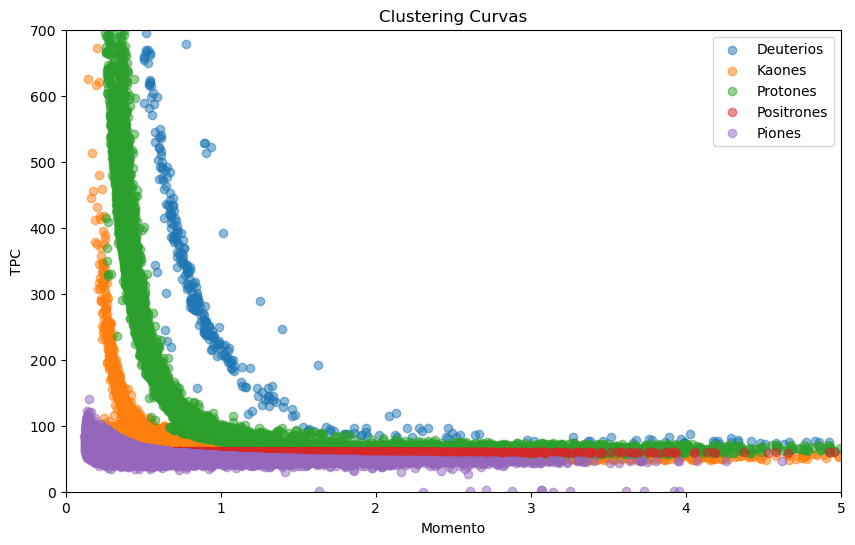

Visualización completa.


In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data set
data = pd.read_csv('PB-POS.csv')
X = data

# Define mapping of cluster numbers to specific names
cluster_mapping = {
    1: 'Positrones',
    3: 'Piones',
    4: 'Kaones',
    5: 'Protones',
    11: 'Deuterios'
}

# Replace cluster numbers with friendly names
X['Cluster_Name'] = X['Clase'].map(cluster_mapping)

plt.figure(figsize=(10, 6))

# Plot each cluster with its descriptive name
for cluster_name in X['Cluster_Name'].unique():
    plt.scatter(X.loc[X['Cluster_Name'] == cluster_name, 'Momento'],
                X.loc[X['Cluster_Name'] == cluster_name, 'TPC'],
                alpha=0.5, label=cluster_name)

plt.title('Clustering Curvas')
plt.xlabel('Momento')
plt.ylabel('TPC')
plt.xlim(0, 5)  
plt.ylim(0, 700)  
plt.legend()
plt.show()

print("Visualización completa.")


4624/4624 ━━━━━━━━━━━━━━━━━━━━ 4s 745us/step
         Momento      TPC  Clase_Predicha
0       2.197910  97.2500               0
1       0.852074  58.1562               1
2       1.905090  65.5625               2
3       0.833449  64.3125               1
4       1.807020  59.6250               3
...          ...      ...             ...
147945  0.630622  52.1250               4
147946  0.135750  92.7500               4
147947  0.661300  70.1250               1
147948  0.825598  49.9062               4
147949  0.528501  60.0625               3

[147950 rows x 3 columns]
   Event        Px        Py        Pz  Particula        Vx        Vy  \
0      0  0.154772 -1.675330  1.413220          0 -0.003124  0.170360   
1      0 -0.553970  0.529156  0.372359          2 -0.003161  0.170325   
2      0  1.207450  0.826940 -1.219660          3 -0.003131  0.170364   
3      0  0.399507  0.632035  0.367156          8 -0.003236  0.170428   
4      0  0.038406 -1.417030  1.120250         10 -0.003127

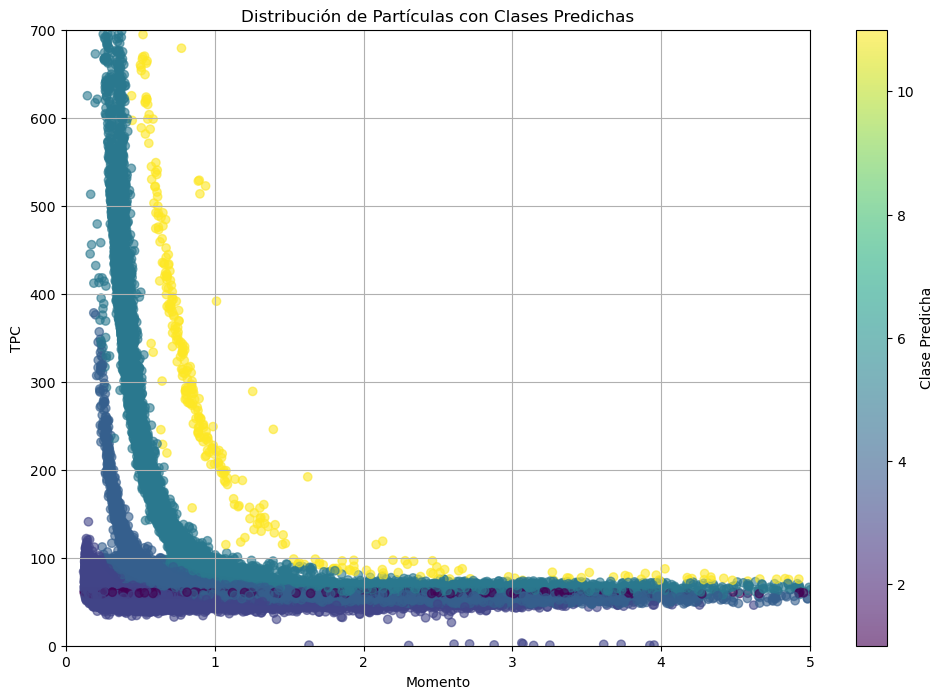

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import numpy as np
import joblib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import os

# 1. Load the incomplete dataset
data_incompleta = pd.read_csv('dataplomo.csv')

# 2. Preprocessing the dataset
# Impute missing values (example using the mean of the column)
data_incompleta.fillna(data_incompleta.mean(), inplace=True)

# Select relevant columns
X_incompleto = data_incompleta[['Momento', 'TPC']].values

# Check for the existence of the scaler.pkl file
scaler_path = 'scaler.pkl'
if not os.path.exists(scaler_path):
    raise FileNotFoundError(f"The file '{scaler_path}' is not found. Make sure you have saved the scaler correctly.")

# Normalize the data (use the same scaler that was used to train the model)
scaler = joblib.load(scaler_path)
X_incompleto_scaled = scaler.transform(X_incompleto)

# 3. Load the trained model
model = load_model('modelo_entrenado.h5')

# Make predictions
predicciones = model.predict(X_incompleto_scaled)
clases_predichas = np.argmax(predicciones, axis=1)

# 4. Display the results
data_incompleta['Clase_Predicha'] = clases_predichas

# Save the results in a new CSV file
data_incompleta.to_csv('datasetpred.csv', index=False)

# Print the first rows of the DataFrame with predictions
print(data_incompleta[['Momento', 'TPC', 'Clase_Predicha']])

# 5. Replacement of values in the 'Clase' column
# Load the DataFrame with predictions
data = pd.read_csv('datasetpred.csv')

# Define the replacement mapping
replacement_mapping = {
    0: 11,
    4: 3,
    1: 4,
    2: 5,
    3: 1
}

# Replace values in the 'Clase_Predicha' column
data['Clase_Predicha'] = data['Clase_Predicha'].replace(replacement_mapping)

# Save the updated DataFrame in a new CSV file
data.to_csv('PBPRED.csv', index=False)

# Show the first rows of the updated DataFrame for verification
print(data.head())

# Calculate the frequency of values in the column
frecuencia = data['Clase_Predicha'].value_counts()

print(frecuencia)

# 6. Visualization
plt.figure(figsize=(12, 8))

# Plot the data with predictions
scatter = plt.scatter(
    data['Momento'],
    data['TPC'],
    c=data['Clase_Predicha'],  # Color by predicted class
    cmap='viridis',  # Color map
    alpha=0.6
)

# Add a color bar
plt.colorbar(scatter, label='Predicted Class')

plt.title('Distribution of Particles with Predicted Classes')
plt.xlabel('Momentum')
plt.ylabel('TPC')
plt.xlim(data['Momento'].min() - 1, data['Momento'].max() + 1)  # Adjust according to the range of your data
plt.ylim(data['TPC'].min() - 10, data['TPC'].max() + 10)  # Adjust according to the range of your data
plt.xlim(0, 5)  # Adjust according to the range of your data
plt.ylim(0, 700)  # Adjust according to the range of your data
plt.grid(True)
plt.show()



In [56]:
import pandas as pd
df = pd.read_csv("dataplomo.csv")
df

,Event,Px,Py,Pz,Particula,Vx,Vy,Vz,ITS,TPC,TOF,Carga,Momento,VxEvent,VyEvent,VzEvent,Clase
0,0,0.154772,-1.675330,1.413220,0,-0.003124,0.170360,2.83827,77.6250,97.2500,16274.8,1,2.197910,-0.003129,0.170359,2.83825,0
1,0,-0.553970,0.529156,0.372359,2,-0.003161,0.170325,2.83817,94.1250,58.1562,99999.0,1,0.852074,-0.003129,0.170359,2.83825,0
2,0,1.207450,0.826940,-1.219660,3,-0.003131,0.170364,2.83826,88.3125,65.5625,16372.4,1,1.905090,-0.003129,0.170359,2.83825,0
3,0,0.399507,0.632035,0.367156,8,-0.003236,0.170428,2.83831,82.7500,64.3125,16689.6,1,0.833449,-0.003129,0.170359,2.83825,0
4,0,0.038406,-1.417030,1.120250,10,-0.003127,0.170359,2.83821,90.5625,59.6250,99999.0,1,1.807020,-0.003129,0.170359,2.83825,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147945,771,-0.212363,0.545846,-0.259436,2559,-0.010305,0.161564,-10.81830,87.5000,52.1250,99999.0,1,0.630622,-0.010311,0.161562,-10.81830,0
147946,771,0.071410,0.101865,-0.051974,2589,-0.010311,0.161562,-10.81830,83.7500,92.7500,99999.0,1,0.135750,-0.010311,0.161562,-10.81830,0
147947,771,-0.528478,-0.367503,-0.152337,2598,-0.010313,0.161565,-10.81830,85.2500,70.1250,99999.0,1,0.661300,-0.010311,0.161562,-10.81830,0
147948,771,0.620486,0.363434,-0.517365,2633,-0.010308,0.161558,-10.81830,86.2500,49.9062,99999.0,1,0.825598,-0.010311,0.161562,-10.81830,0


In [20]:
# Calculate the frequency of values ​​in the column
frecuencia = df['Clase'].value_counts()
print(frecuencia)

0     139185
5       7434
4        999
11       238
3         94
Name: Clase, dtype: int64
